In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

In [3]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'

try:
    train_df = pd.read_csv(train_file_path)
    print("Training data loaded successfully")
    print(train_df.head)
except FileNotFoundError:
    print('Training data not found')


try:
    test_df = pd.read_csv(test_file_path)
    print("Testing data loaded successfully")
    print(test_df.head)
except FileNotFoundError:
    print('/nTest data not found')    






Training data loaded successfully
<bound method NDFrame.head of       beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0        3    2.5  2590.0       sqft   6000.00           sqft     98144   
1        4    2.0  2240.0       sqft      0.31           acre     98106   
2        4    3.0  2040.0       sqft   3783.00           sqft     98107   
3        4    3.0  3800.0       sqft   5175.00           sqft     98199   
4        2    2.0  1042.0       sqft       NaN            NaN     98102   
...    ...    ...     ...        ...       ...            ...       ...   
2011     3    2.0  1370.0       sqft      0.50           acre     98112   
2012     1    1.0   889.0       sqft       NaN            NaN     98121   
2013     4    2.0  2140.0       sqft   6250.00           sqft     98199   
2014     2    2.0   795.0       sqft       NaN            NaN     98103   
2015     3    2.0  1710.0       sqft   4267.00           sqft     98133   

          price  
0      795000.0  

In [6]:
#check missing value for test data
test_df.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [7]:
train_df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [8]:
print(train_df.info())


print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 

In [9]:
print(train_df.shape)

print(test_df.shape)

(2016, 8)
(505, 8)


In [10]:
print(train_df.describe)

print(test_df.describe)


<bound method NDFrame.describe of       beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0        3    2.5  2590.0       sqft   6000.00           sqft     98144   
1        4    2.0  2240.0       sqft      0.31           acre     98106   
2        4    3.0  2040.0       sqft   3783.00           sqft     98107   
3        4    3.0  3800.0       sqft   5175.00           sqft     98199   
4        2    2.0  1042.0       sqft       NaN            NaN     98102   
...    ...    ...     ...        ...       ...            ...       ...   
2011     3    2.0  1370.0       sqft      0.50           acre     98112   
2012     1    1.0   889.0       sqft       NaN            NaN     98121   
2013     4    2.0  2140.0       sqft   6250.00           sqft     98199   
2014     2    2.0   795.0       sqft       NaN            NaN     98103   
2015     3    2.0  1710.0       sqft   4267.00           sqft     98133   

          price  
0      795000.0  
1      915000.0  
2      9500

In [11]:
#fill in the missing values for both train and test df with fillna(mean)
mean_lot_size_train = train_df['lot_size'].mean()
train_df.fillna({'lot_size': mean_lot_size_train}, inplace=True)
test_df.fillna({'lot_size':mean_lot_size_train}, inplace=True)

print(test_df.isnull().sum())



beds               0
baths              0
size               0
size_units         0
lot_size           0
lot_size_units    77
zip_code           0
price              0
dtype: int64


In [12]:
#fill in the missing values for both train and test df with fillna(mode)
mode_lot_size_units_train = train_df['lot_size_units'].mode()[0]
train_df.fillna({'lot_size_units':mode_lot_size_units_train}, inplace=True)
test_df.fillna({'lot_size_units':mode_lot_size_units_train}, inplace=True)
print(train_df.isnull().sum())

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64


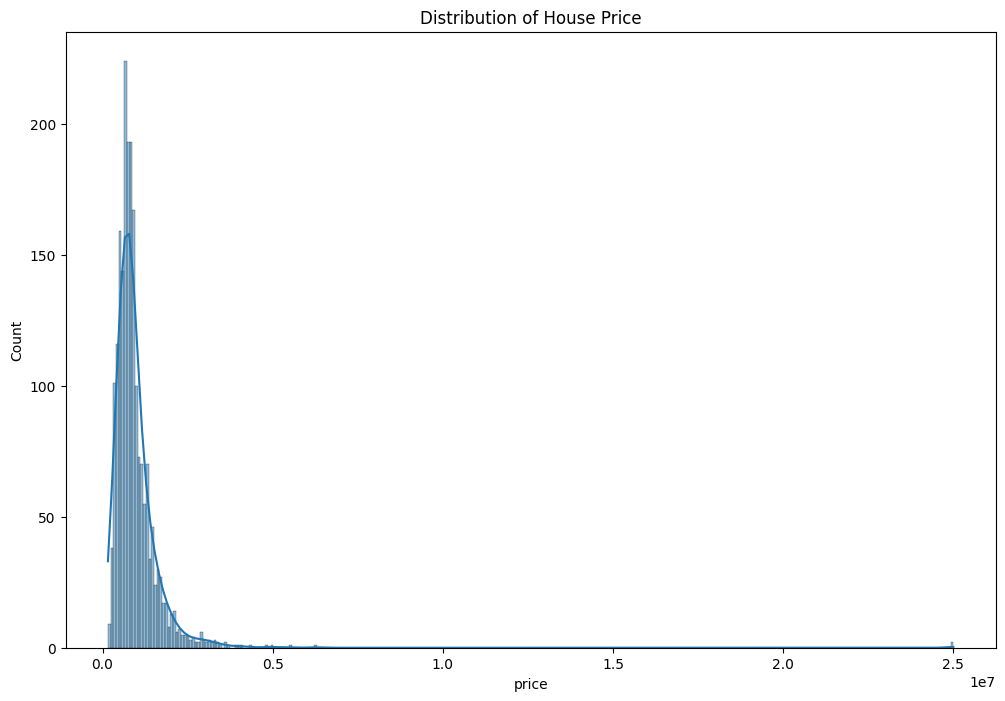

In [13]:
plt.figure(figsize=[12,8])
sns.histplot(train_df['price'],kde=True)
plt.title("Distribution of House Price")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

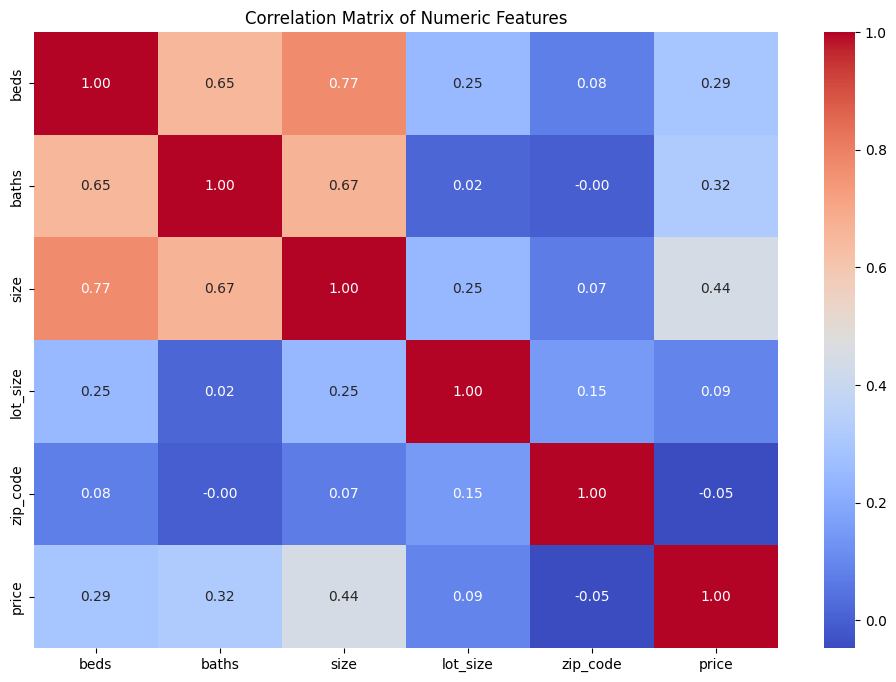

In [14]:
 # Correlation analysis
plt.figure(figsize=(12, 8))
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')

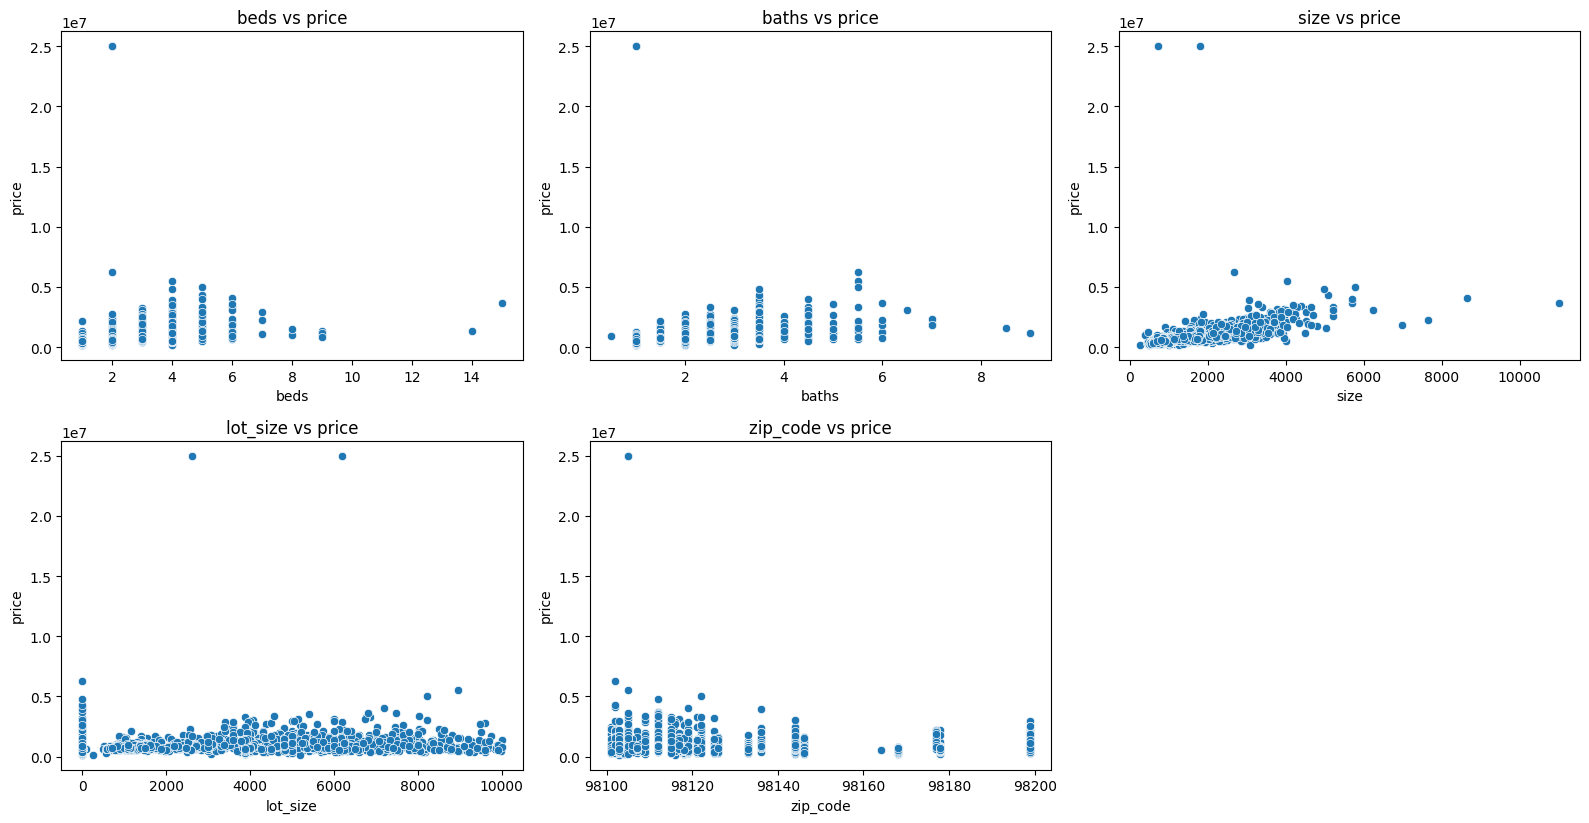

In [15]:
 # Feature relationships
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns[:-1], 1):  # Exclude price from x-axis
        plt.subplot(3, 3, i)
        sns.scatterplot(x=train_df[column], y=train_df['price'])
        plt.title(f'{column} vs price')
        plt.tight_layout()
              

### Feature Engineering

In [16]:
#Convert lot size to consistent units (all sqft)
def standardize_lot_size(df):
    # Create a copy to avoid modifying the original dataframe
    result_df = df.copy()
    # Convert acres to sqft (1 acre = 43,560 sqft)
    mask = result_df['lot_size_units'] == 'acre'
    result_df.loc[mask, 'lot_size'] = result_df.loc[mask, 'lot_size'] * 43560
    result_df['lot_size_units'] = 'sqft'
    return result_df

train_df = standardize_lot_size(train_df)
test_df = standardize_lot_size(test_df)

In [17]:
# Create additional features
train_df['price_per_sqft'] = train_df['price'] / train_df['size']
test_df['price_per_sqft'] = test_df['price'] / test_df['size']

train_df['bed_bath_ratio'] = train_df['beds'] / train_df['baths']
test_df['bed_bath_ratio'] = test_df['beds'] / test_df['baths']

print(train_df.head())


   beds  baths    size size_units      lot_size lot_size_units  zip_code  \
0     3    2.5  2590.0       sqft   6000.000000           sqft     98144   
1     4    2.0  2240.0       sqft  13503.600000           sqft     98106   
2     4    3.0  2040.0       sqft   3783.000000           sqft     98107   
3     4    3.0  3800.0       sqft   5175.000000           sqft     98199   
4     2    2.0  1042.0       sqft   3871.059694           sqft     98102   

       price  price_per_sqft  bed_bath_ratio  
0   795000.0      306.949807        1.200000  
1   915000.0      408.482143        2.000000  
2   950000.0      465.686275        1.333333  
3  1950000.0      513.157895        1.333333  
4   950000.0      911.708253        1.000000  


In [18]:
# One-hot encode zip codes
train_df_encoded = pd.get_dummies(train_df, columns=['zip_code'], prefix='zip')
test_df_encoded = pd.get_dummies(test_df, columns=['zip_code'], prefix='zip')

# Ensure test has same columns as train
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0

# Ensure columns are in the same order
test_df_encoded = test_df_encoded[train_df_encoded.columns]


In [19]:
#Split training data into features and target
X_train = train_df_encoded.drop(['price', 'size_units', 'lot_size_units', 'price_per_sqft'], axis=1)
y_train = train_df_encoded['price']

X_test = test_df_encoded.drop(['price', 'size_units', 'lot_size_units', 'price_per_sqft'], axis=1)
y_test = test_df_encoded['price']

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [22]:
# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
   
}
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_split, y_train_split)
    
    # Make predictions on validation set
    val_predictions = model.predict(X_val)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, val_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, val_predictions)
    r2 = r2_score(y_val, val_predictions)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.4f}")


Linear Regression Results:
MSE: 170653398008.28
RMSE: 413102.16
MAE: 233594.64
R2: 0.4825

Ridge Regression Results:
MSE: 169130662913.48
RMSE: 411254.99
MAE: 232655.46
R2: 0.4872


/home/christine/Projects/House_Price_Prediction/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.270e+13, tolerance: 1.662e+11
  model = cd_fast.enet_coordinate_descent(



Lasso Regression Results:
MSE: 170654022297.80
RMSE: 413102.92
MAE: 233592.24
R2: 0.4825

Random Forest Results:
MSE: 262412100822.29
RMSE: 512261.75
MAE: 216128.95
R2: 0.2043


In [23]:
# Select the best model and evaluate on test set

best_model = models['Ridge Regression']
test_predictions = best_model.predict(X_test)

# Calculate final metrics on test set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("\nFinal Test Results:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R2: {test_r2:.4f}")



Final Test Results:
MSE: 186861153603.51
RMSE: 432274.40
MAE: 251222.65
R2: 0.4943


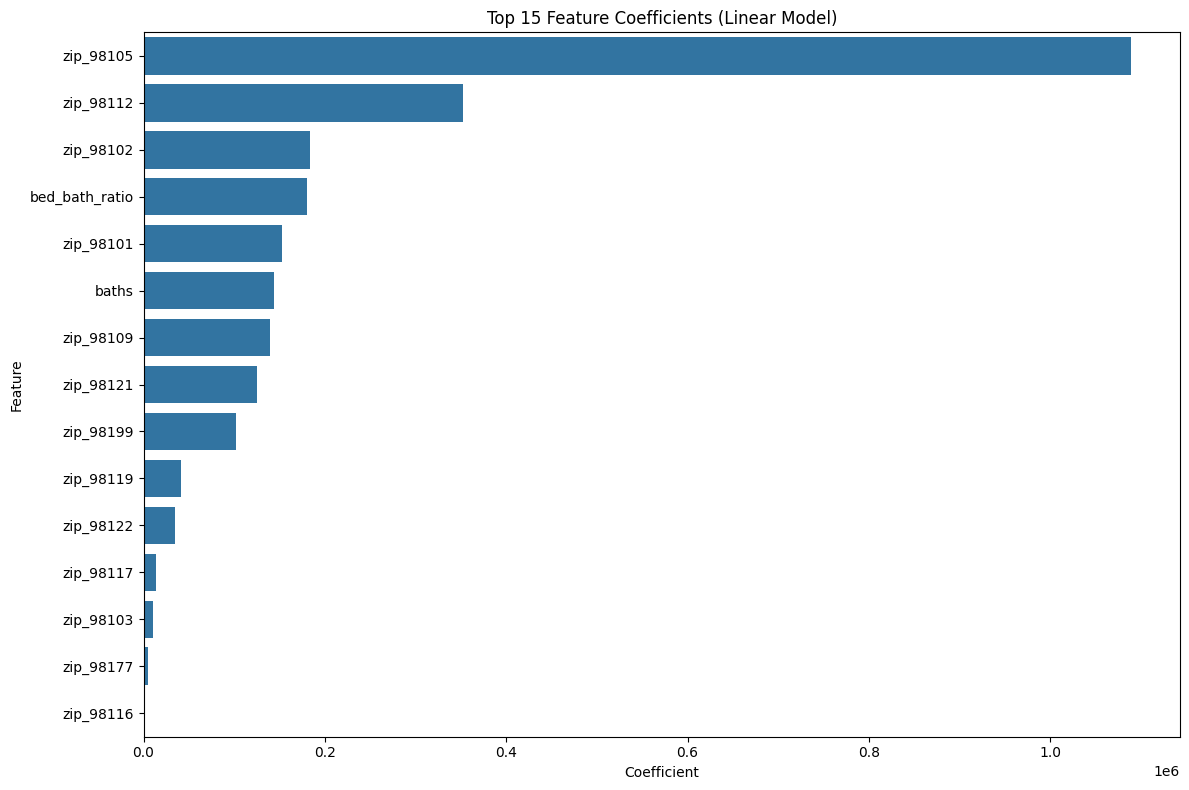

In [24]:
#Feature importance analysis for the best model
if hasattr(best_model, 'coef_'):
    importances = best_model.coef_
    features = X_train.columns  # Use processed column names

    feature_importance_df_linear = pd.DataFrame({
        'Feature': features,
        'Coefficient': importances
    }).sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df_linear.head(15))
    plt.title('Top 15 Feature Coefficients (Linear Model)')
    plt.tight_layout()
    plt.show()
else:
    print("The best model does not have 'coef_' attribute for feature importance.")




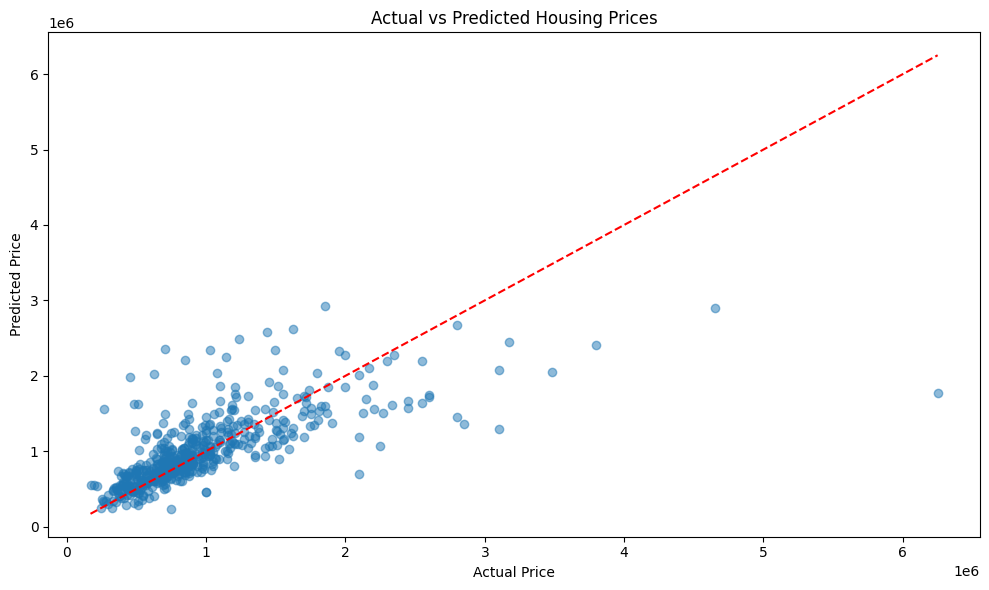

In [25]:
#Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.show()


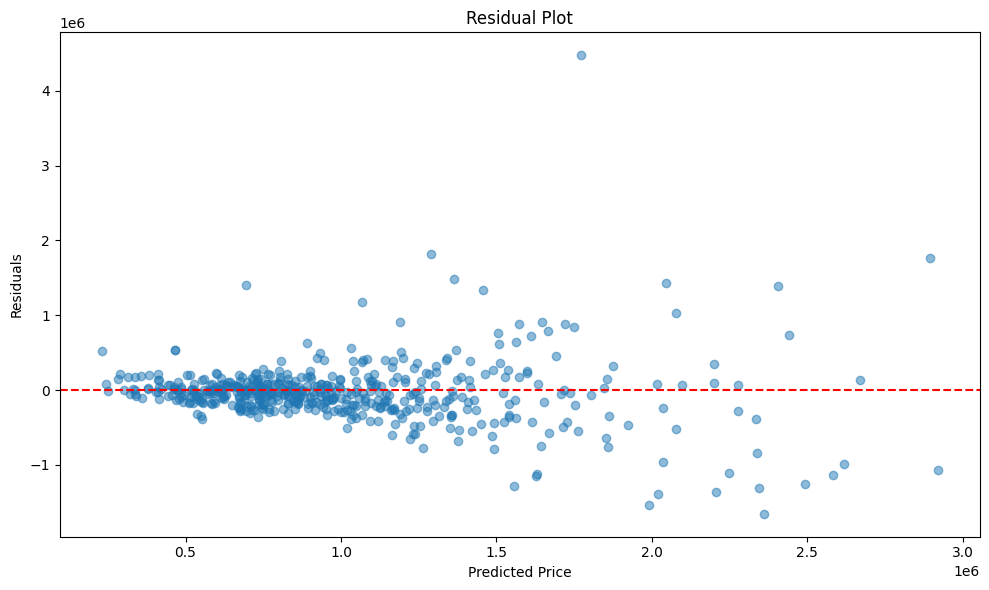

In [26]:
#Plot residuals
residuals = y_test - test_predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

#### Model Hypertuning and Scalin

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [30]:
# Create a scaler
scaler = StandardScaler()

# Scale the numeric features only
numeric_features = ['beds', 'baths', 'size', 'lot_size']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])



In [31]:
# Modified hyperparameter tuning with increased max_iter
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['svd', 'cholesky', 'lsqr'],  # Removing problematic solvers
    'max_iter': [10000]  # Increase max iterations for convergence
}

# Create grid search with scaled features
ridge_grid_search = GridSearchCV(
    Ridge(random_state=42),
    ridge_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Fit grid search with scaled features
ridge_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters: {ridge_grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-ridge_grid_search.best_score_):.2f}")

# Get the best model
best_ridge_model = ridge_grid_search.best_estimator_

# Evaluate on test set
ridge_test_predictions = best_ridge_model.predict(X_test_scaled)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_predictions))
print(f"Test RMSE with tuned Ridge model: {ridge_test_rmse:.2f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'alpha': 10.0, 'max_iter': 10000, 'solver': 'lsqr'}
Best RMSE: 824379.42
Test RMSE with tuned Ridge model: 407863.55


In [32]:
#Try feature selection to reduce multicollinearity
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use RFE to select the best features
selector = RFE(LinearRegression(), n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Train Ridge model with selected features
ridge_model_rfe = Ridge(
    alpha=ridge_grid_search.best_params_['alpha'],
    solver=ridge_grid_search.best_params_['solver'],
    max_iter=10000,
    random_state=42
)
ridge_model_rfe.fit(X_train_rfe, y_train)

# Evaluate
rfe_predictions = ridge_model_rfe.predict(X_test_rfe)
rfe_rmse = np.sqrt(mean_squared_error(y_test, rfe_predictions))
print(f"RFE Ridge RMSE: {rfe_rmse:.2f}")

RFE Ridge RMSE: 422978.70


In [33]:
#  Try Regularized models that are less sensitive to multicollinearity
from sklearn.linear_model import ElasticNet

# ElasticNet combines L1 and L2 regularization
elastic_model = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    max_iter=10000,
    random_state=42
)
elastic_model.fit(X_train_scaled, y_train)

# Evaluate
elastic_predictions = elastic_model.predict(X_test_scaled)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_predictions))
print(f"ElasticNet RMSE: {elastic_rmse:.2f}")

ElasticNet RMSE: 405628.56


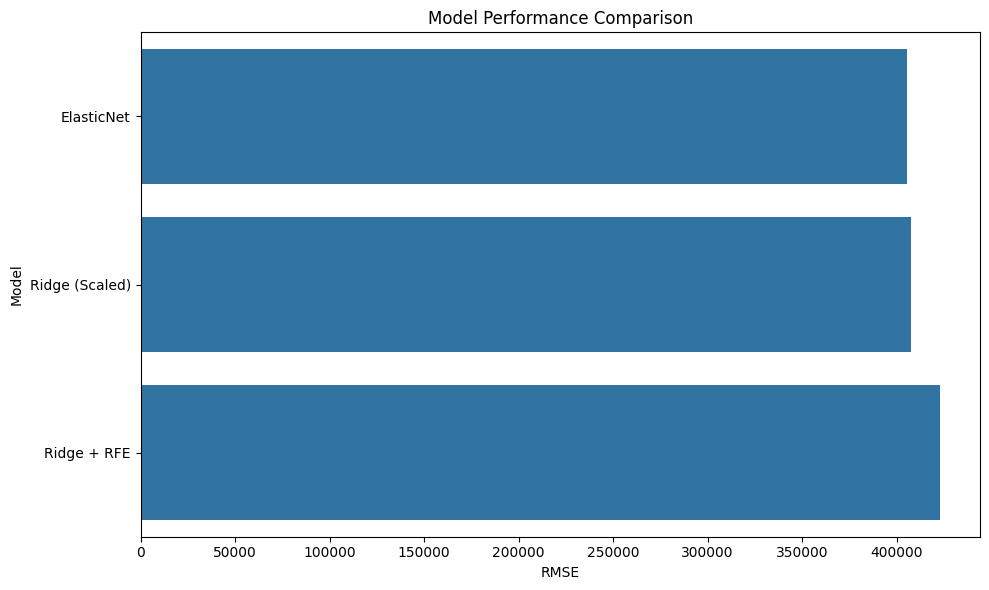

In [34]:
#Compare models
models_comparison = pd.DataFrame({
    'Model': ['Ridge (Scaled)', 'Ridge + RFE', 'ElasticNet'],
    'RMSE': [ridge_test_rmse, rfe_rmse, elastic_rmse]
})

# Sort by performance
models_comparison = models_comparison.sort_values('RMSE')

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=models_comparison)
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

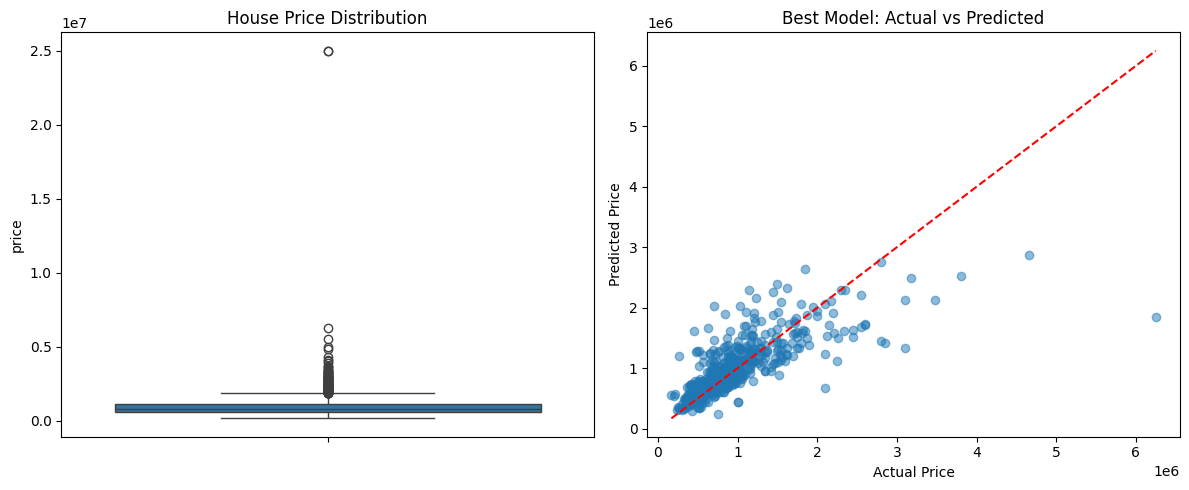

In [35]:
# Check for outliers 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=y_train)
plt.title('House Price Distribution')

plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model: Actual vs Predicted')
plt.tight_layout()
plt.show()

In [36]:
# 7. Save the final model (use the best one from the comparison)
import joblib
best_model_index = models_comparison['RMSE'].idxmin()
best_model_name = models_comparison.loc[best_model_index, 'Model']
print(f"Best model: {best_model_name}")

if best_model_name == 'Ridge (Scaled)':
    final_model = best_ridge_model
    joblib.dump((final_model, scaler), 'ridge_house_price_model.pkl')
elif best_model_name == 'Ridge + RFE':
    final_model = ridge_model_rfe
    joblib.dump((final_model, scaler, selector), 'ridge_rfe_house_price_model.pkl')
else:  # ElasticNet
    final_model = elastic_model
    joblib.dump((final_model, scaler), 'elastic_house_price_model.pkl')

print("Final model saved.")


Best model: ElasticNet
Final model saved.


In [37]:
# 8. Create prediction function
def predict_house_price(beds, baths, size, lot_size, zip_code):
    # Create DataFrame for the new house
    new_house = pd.DataFrame({
        'beds': [beds],
        'baths': [baths],
        'size': [size],
        'lot_size': [lot_size],
        'zip_code': [zip_code]
    })
    
    # One-hot encode zip code (assuming same encoding as training data)
    new_house_encoded = pd.get_dummies(new_house, columns=['zip_code'], prefix='zip')
    
    # Add any missing columns from training data
    for col in X_train.columns:
        if col not in new_house_encoded.columns:
            new_house_encoded[col] = 0
    
    # Ensure columns are in the same order as training data
    new_house_encoded = new_house_encoded[X_train.columns]
    
    # Make prediction
    price_prediction = best_ridge_model.predict(new_house_encoded)[0]
    
    return price_prediction

# Example usage
example_price = predict_house_price(
    beds=3, 
    baths=2, 
    size=2000, 
    lot_size=5000, 
    zip_code=98103
)
print(f"Predicted price for example house: ${example_price:.2f}")


Predicted price for example house: $841089013.38
